## Step 1: Obtain Data

**Dataset:** IMDB 50K Movie Reviews

**Why I chose this dataset:**
- I like movie data a lot
- Knowing movie data, I'll be able to troubleshoot more easily


In [228]:
import pandas as pd

# Loaded the IMDb dataset
df = pd.read_csv("../data/imdb_reviews.csv")

# Showing the first 5 rows
df.head()


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

## Step 2: Explore the Dataset

### 2.1 Metadata Description

- What are the columns? 
- What are the data types? 
- How many rows? 
- Are there missing values? 
- What column contains the main text?


In [77]:
# Displayed column names
df.columns


Index(['review', 'sentiment'], dtype='object')

In [78]:
# Displayed data types and number of rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [79]:
# Checked for missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

#### 2.1 Answers

- **Columns:**  
  The dataset contains two columns:  
  - `review`  
  - `sentiment`

- **Data Types:**  
  - `review`: object (text data)  
  - `sentiment`: object (categorical labels)

- **Number of Rows:**  
  The dataset contains 50,000 rows

- **Missing Values:**  
  There are 0 missing values in the 2 columns

- **Main Text Column:**  
  The primary text data is contained in the `review` column


### 2.2 Data Description

- **Descriptive statistics** (main text column):
  - Minimum text length (characters)
  - Maximum text length (characters) 
  - Mean text length 
  - Median text length

- **Sample texts**: Show 5-10 examples

- **Visualizations**: Text length distribution histogram



In [82]:
# text length in characters
df["text_length"] = df["review"].astype(str).str.len()

df[["review", "text_length"]].head()

# Did Descriptive statistics for text length
df["text_length"].describe().round(0).astype(int)


count    50000
mean      1309
std        990
min         32
25%        699
50%        970
75%       1590
max      13704
Name: text_length, dtype: int64

#### 2.2 Text Length Descriptive Statistics Answers

- **Minimum text length:** 32 characters  
- **Maximum text length:** 13,704 characters  
- **Mean text length:** 1,309 characters  
- **Median text length:** 970 characters  



In [84]:
# Displayed 5 sample reviews
df["review"].sample(5, random_state=42)


33553                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I really liked this Summerslam due to the lo

#### 2.2 Sample Text Answers

The sampled reviews show that:
- The reviews are written in full sentences and paragraphs
- There are a lot of reviews that are very biased and have strong opinions


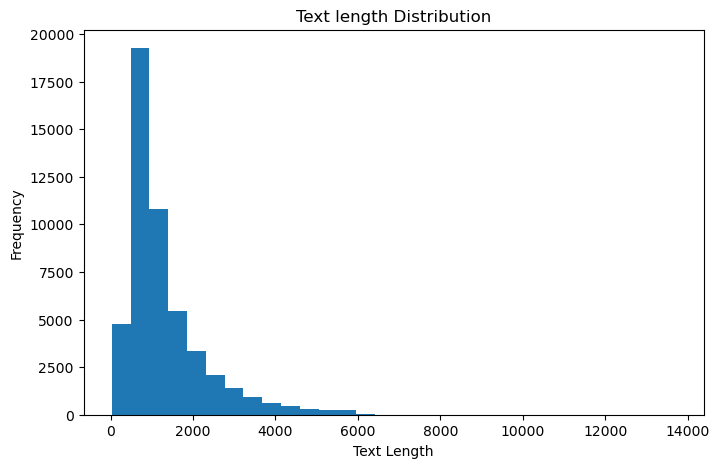

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["text_length"], bins=30)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Text length Distribution")
plt.show()


#### 2.2 Visualization: Text Length Distribution (Histogram)

The histogram shows a right-skewed distribution of text lengths for the review column

Most movie reviews fall around 400 and 2,000 characters, showing that the majority of users write moderately detailed reviews. 

- The dataset contains high variability in text length
- Most observations are concentrated at shorter lengths
- A small amount of outliers may need to be considered during modeling



#### 2.3 Initial Observations

**Read several texts and answer:**
- What language is it in?
- Are there special characters (URLs, emojis, hashtags)?
- Do you see HTML tags?
- Are there obvious cleaning issues?
- What patterns do you notice?


In [89]:
pd.set_option("display.max_colwidth", None)
df["review"].sample(3, random_state=42)

33553                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       I really liked this Summerslam due to the lo

### 2.3 Initial Observations:

- **Language:**  
  The reviews are written in English.

- **Special Characters:**  
  The text does not contain emojis or hashtags.

- **HTML Tags:**  
  Some reviews contain HTML line break tags, most commonly `<br />` and `<br /><br />`. These tags interrupt the text flow, showing that we need to do HTML removal during preprocessing.

- **URLs:**  
  There were no URLs or external links observed in the sampled reviews.

  
- **Obvious Cleaning Issues:**  
  The presence of HTML tags, inconsistent spacing, and formatting artifacts suggests that text preprocessing will be required. We'll ned to remove HTML tags, normalize whitespace, and standardize text casing  

- **Patterns:**  
  The reviews' length ranges from short sentences to multiple long paragraphs. Positive reviews contain enthusiastic language and praise, while negative reviews show disappointment or criticism. Many reviews reference specific plot points, characters, or performances.


### 3.1 Design Your Cleaning Pipeline

**Common cleaning steps (customize for your data):**

1. Remove HTML tags
2. Remove URLs
3. Remove special characters (or keep emojis if relevant)
4. Handle contractions (e.g., “don’t” → “do not”)
5. Lowercase conversion
6. Remove extra whitespace
7. Handle numbers (remove, spell out, or keep)



In [92]:
# Removed HTML tags
import re

def remove_html(text):
    return re.sub(r"<.*?>", " ", text)

# Removed URLs
def remove_urls(text):
    return re.sub(r"http\S+|www\S+", " ", text)

# Expanded common contractions
def expand_contractions(text):
    contractions = {
        "don't": "do not",
        "can't": "cannot",
        "won't": "will not",
        "it's": "it is",
        "i'm": "i am",
        "you're": "you are",
        "they're": "they are",
        "that's": "that is",
        "isn't": "is not",
        "aren't": "are not"
    }
    for c, expanded in contractions.items():
        text = re.sub(rf"\b{c}\b", expanded, text)
    return text
#Removed special characters and numbers
def remove_special_chars(text):
    return re.sub(r"[^a-zA-Z\s]", " ", text)

#Cleaned extra whitespace
def normalize_whitespace(text):
    return re.sub(r"\s+", " ", text).strip()


### 3.2 Spot-Check Validation

- Show before/after examples
- For at least 3 examples, show:
- Before: Raw text 
- After: Cleaned text 
- Why this matters: Explanation of what was fixed


In [94]:
# Ensured full text is displayed
pd.set_option("display.max_colwidth", None)

# Selected 3 sample reviews
samples = df["review"].sample(3, random_state=42)

for i, review in enumerate(samples, start=1):
    cleaned = review
    
    # Applied cleaning pipeline step-by-step (from 3.1)
    cleaned = remove_html(cleaned)
    cleaned = remove_urls(cleaned)
    cleaned = expand_contractions(cleaned)
    cleaned = cleaned.lower()
    cleaned = remove_special_chars(cleaned)
    cleaned = normalize_whitespace(cleaned)
    
    print(f"Example {i}")
    print("Before:")
    print(review)
    print("\nAfter:")
    print(cleaned)
    print("-" * 100)


Example 1
Before:
I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yok

### 3.3 Edge Cases

Consider: - Empty strings after cleaning - Very short texts (1-2 words) - Non-English text (if present) - Special formatting (quotes, punctuation)

Deliverable: Cleaning pipeline code + before/after examples


In [96]:
def clean_text(text):
    text = str(text)

    text = remove_html(text)
    text = remove_urls(text)
    text = text.lower()
    text = expand_contractions(text)

    # Remove rating patterns
    text = re.sub(r"\b\d+\s*/\s*\d+\b", " ", text)

    text = remove_special_chars(text)
    text = normalize_whitespace(text)

    return text

df["clean_review"] = df["review"].apply(clean_text)

empty_count = (df["clean_review"].str.len() == 0).sum()

word_count = df["clean_review"].str.split().str.len()
short_count = (word_count <= 2).sum()

non_english_count = df["review"].astype(str).apply(lambda x: any(ord(ch) > 127 for ch in x)).sum()

# Check raw text artifacts
html_count = df["review"].astype(str).str.contains(r"<.*?>", regex=True).sum()
url_count = df["review"].astype(str).str.contains(r"http\S+|www\S+", regex=True).sum()

print("EDGE CASE SUMMARY")
print("Total rows:", len(df))
print("Empty after cleaning:", empty_count)
print("Very short after cleaning (<=2 words):", short_count)
print("Contains any non-ascii characters (possible non-English/emojis):", non_english_count)
print("Raw reviews containing HTML tags:", html_count)
print("Raw reviews containing URLs:", url_count)


EDGE CASE SUMMARY
Total rows: 50000
Empty after cleaning: 0
Very short after cleaning (<=2 words): 0
Contains any non-ascii characters (possible non-English/emojis): 4660
Raw reviews containing HTML tags: 29202
Raw reviews containing URLs: 232


### 3.3 Edge Cases – Findings

- 50,000 reviews

- The cleaning pipeline did not wipe out any reviews completely.

- No reviews collapsed into extremely short texts.

- 4,660 reviews contained Non-ASCII characters.

- 29,202 reviews contained HTML tags. 

- 232 reviews contained URL.

In [98]:
def show_before_after(indices):
    for i in indices:
        before = df.loc[i, "review"]
        after = df.loc[i, "clean_review"]
        print(f"Index: {i}")
        print("BEFORE:\n", before)
        print("\nAFTER:\n", after)
        print("\n" + "-"*100 + "\n")


html_idx = df[df["review"].astype(str).str.contains(r"<.*?>", regex=True)].sample(1, random_state=42).index.tolist()

url_idx = df[df["review"].astype(str).str.contains(r"http\S+|www\S+", regex=True)].sample(1, random_state=42).index.tolist()

non_ascii_idx = df[df["review"].astype(str).apply(lambda x: any(ord(ch) > 127 for ch in x))].sample(1, random_state=42).index.tolist()

# Combine
example_indices = html_idx + url_idx + non_ascii_idx

show_before_after(example_indices)


Index: 44146
BEFORE:
 This is a typical college comedy and its very average. The story is OK but not very entertaining. Its about a unlucky guy named Reno who looses his job, gets his car ripped off and then his uncle dies in a stripbar. His got a girlfriend though (a nice one btw. :-). Anyway this uncle gives him his mansion in LA and mercedes as heritage and soon Reno and his girlfriend moves to LA to this new house. The problem is that they would need some roommates in order to pay the high rent for this house and so the film unfolds... <br /><br />The movie starts OK and has a few funny jokes here and there, but the suddenly the movie takes a turn straight down to hell... The ending is BAD. Really BAD. It destroys everything about the movie. You will know what I'm talking about when you see the movie...<br /><br />2/10

AFTER:
 this is a typical college comedy and its very average the story is ok but not very entertaining its about a unlucky guy named reno who looses his job gets h

# **STEP 4: Tokenize, Feature Engineer, and Vectorize**

- Important: VADER and TextBlob may need different preprocessing!

## **4.1 VADER Pipeline:**

- How does VADER tokenize?

- What features does VADER use?

- What preprocessing does VADER expect?

## **4.2 TextBlob Pipeline**

- How does TextBlob tokenize?

- What features does TextBlob use?

- What preprocessing does TextBlob expect?

## **4.3 Transformer Pipeline**

- How does distilbert-base-uncased-emotion (https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion ) tokenize?

- What features does distilbert use?

- What preprocessing does distilbertexpect?

## **4.4 Key Differences**

- **Document any differences in:**

- Tokenization approach, feature engineering, Vectorization, & preprocessing requirements





In [100]:
import nltk
nltk.download("vader_lexicon")

from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def vader_preprocess(text):
    text = str(text)
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def vader_pipeline(text):
    text = vader_preprocess(text)
    return sia.polarity_scores(text)

def textblob_pipeline(text):
    text = str(text)
    blob = TextBlob(text)
    return {"polarity": blob.sentiment.polarity,
            "subjectivity": blob.sentiment.subjectivity}

sample = df.sample(3, random_state=42)

for _, row in sample.iterrows():
    raw = row["review"]
    clean = row["clean_review"]
    print("-----")
    print("RAW:", raw[:200], "...")
    print("VADER:", vader_pipeline(raw))
    print("TEXTBLOB:", textblob_pipeline(clean))


-----
RAW: I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ev ...
VADER: {'neg': 0.103, 'neu': 0.775, 'pos': 0.122, 'compound': 0.0891}
TEXTBLOB: {'polarity': -0.003968253968253997, 'subjectivity': 0.6301587301587301}
-----
RAW: Not many television shows appeal to quite as many different kinds of fans like Farscape does...I know youngsters and 30/40+ years old;fans both Male and Female in as many different countries as you ca ...
VADER: {'neg': 0.023, 'neu': 0.866, 'pos': 0.111, 'compound': 0.9848}
TEXTBLOB: {'polarity': 0.15458829365079366, 'subjectivity': 0.476736111111111}
-----
RAW: The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal's driving, but tha ...
VADER: {'neg': 0.051, 'neu': 0.81, 'pos': 0.139, 'c

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anthonyhanna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# **Step 4 Markdown Explanations**

## **4.1 VADER Pipeline Answers:**

- VADER does rule-based token handling. It reads the raw string and reacts to any punctuation, capitalization, and other things like (“!!!”, “??”, “ALL CAPS”, emojis).

- It uses a rule and lexicon system with sentiment word scores. Vader adjusts them using punctuation, capitalization, negations, and intensity words.

- VADER works best with lightly cleaned text, so keep punctuation, capitalization, and emphasis cues but remove URLs or HTML.

## **4.2 Vader TextBlob Pipeline Answers:**

- It uses standard sentence and word tokenization to split text into normal linguistic units.

- It uses a sentiment lexicon and averages polarity and subjectivity scores across words and phrases.

- TextBlob expects normally cleaned lowercase text where symbols, HTML, and noise are taken out.

## **4.3 Transformer Pipeline Answers:**

- distilbert-base-uncased-emotion uses a WordPiece subword tokenizer, adds special tokens and masks, then sends token IDs into a smaller, faster BERT-style model.
  
- It uses contextual embeddings and attention to learn meaning from word context. This version looks for emotion detection and runs faster than full BERT.

- Not much because the built-in tokenizer handles casing, punctuation, and structure automatically.

## **4.4 Key Differences Answers:** 

- VADER reads raw text with rule cues, TextBlob uses standard tokenization, and DistilBERT uses subword neural tokenization with special tokens.

- VADER and TextBlob use lexicons and rules. DistilBERT learns features from context with neural embeddings.

- VADER and TextBlob output sentiment scores directly. DistilBERT creates contextual vectors before classification.

- VADER needs light cleaning, TextBlob standard cleaning, and DistilBERT needs very little manual cleaning.

# **STEP 5: Apply Pretrained Models**

## **5.1 Implement VADER**

- from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [103]:
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

def vader_scores(text):
    text = str(text).strip()
    if text == "":
        return {"neg":0.0, "neu":0.0, "pos":0.0, "compound":0.0}
    return vader.polarity_scores(text)

vader_sample = df["review"].sample(5, random_state=42).apply(vader_scores).apply(pd.Series)
vader_sample


Note: you may need to restart the kernel to use updated packages.


,neg,neu,pos,compound
33553,0.100,0.779,0.121,0.1989
9427,0.022,0.871,0.107,0.9848
199,0.049,0.818,0.133,0.9245
12447,0.108,0.697,0.196,0.8977
39489,0.067,0.844,0.088,0.8257


## **5.2 Implement TextBlob**

- from textblob import TextBlob

In [105]:
from textblob import TextBlob

def textblob_scores(text):
    text = str(text).strip()
    if text == "":
        return {"polarity": 0.0, "subjectivity": 0.0}
    blob = TextBlob(text)
    return {"polarity": blob.sentiment.polarity,
            "subjectivity": blob.sentiment.subjectivity}

tb_sample = df["clean_review"].sample(5, random_state=42).apply(textblob_scores).apply(pd.Series)
tb_sample


,polarity,subjectivity
33553,-0.003968,0.630159
9427,0.154588,0.476736
199,0.204167,0.463636
12447,0.361429,0.615357
39489,-0.014750,0.553183


I used clean_review since TextBlob works well with basic cleaning. It returns polarity (positive vs negative) and subjectivity (how opinion based the text is).

## **5.3 Implement transformer model:**

- Try the distilbert-base-uncased-emotion (https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion)
- from transformers import AutoTokenizer, AutoModelForSequenceClassification
- tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")
- model = AutoModelForSequenceClassification.from_pretrained("bhadresh-savani/distilbert-base-uncased-emotion")
- **What to extract**: - sadness, joy, love, anger, fear, surprise


In [108]:
%pip install transformers torch
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

labels = list(model.config.id2label.values())

def distilbert_emotion_scores(text, max_len=256):
    text = str(text).strip()
    if text == "":
        # return zeros for all emotions if empty
        return {label: 0.0 for label in labels}

    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=max_len
    )

    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.softmax(outputs.logits, dim=1).squeeze().tolist()

    return {labels[i]: float(probs[i]) for i in range(len(labels))}

bert_sample = df["review"].sample(5, random_state=42).apply(distilbert_emotion_scores).apply(pd.Series)
bert_sample


Note: you may need to restart the kernel to use updated packages.


Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

,sadness,joy,love,anger,fear,surprise
33553,0.531801,0.413874,0.003429,0.044460,0.002678,0.003758
9427,0.554265,0.181079,0.003166,0.250641,0.008648,0.002201
199,0.016924,0.963100,0.001216,0.016408,0.001685,0.000668
12447,0.000521,0.995886,0.000371,0.000414,0.000396,0.002412
39489,0.001865,0.988419,0.001435,0.006617,0.001098,0.000566


## **5.4 Handle Edge Cases**

**What happens if:**
- Text is empty?
- Text is non-English?
- Text has unusual characters?
  
Test these cases and document behavior!


In [110]:
edge_cases = {
    "Empty string": "",
    "Non-English (Spanish)": "Esta película fue increíble y muy emotiva.",
    "Unusual characters / emojis": "WOW!!! 😍🔥 This movie was AMAZING!!! #bestmovie <br /> http://example.com"
}

results = []

for name, txt in edge_cases.items():
    results.append({
        "case": name,
        "text": txt,
        "vader_compound": vader_scores(txt)["compound"],
        "textblob_polarity": textblob_scores(txt)["polarity"],
        "textblob_subjectivity": textblob_scores(txt)["subjectivity"],
        **distilbert_emotion_scores(txt)
    })

edge_results = pd.DataFrame(results)
edge_results


,case,text,vader_compound,textblob_polarity,textblob_subjectivity,sadness,joy,love,anger,fear,surprise
0,Empty string,,0.0000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Non-English (Spanish),Esta película fue increíble y muy emotiva.,0.0000,0.000000,0.00,0.017352,0.656550,0.002956,0.261979,0.056826,0.004336
2,Unusual characters / emojis,WOW!!! 😍🔥 This movie was AMAZING!!! #bestmovie <br /> http://example.com,0.9158,0.597656,0.95,0.001990,0.940441,0.001207,0.001573,0.002066,0.052723


# **STEP 6: Analyze and Review Results**

## **6.1 Random Sample Review (100 rows)**

**Methodology:**
- Select 100 random rows
- Review each manually
- Compare with VADER TextBlob, and Transformer predictions
- Same rows to compare all three
- To establish ground truth, you need to resolve these scores / category you received into three categories: positive, negative, neutral. It’s up to you on how to resolve the scores from the model to these.
- You should note that VADER is easier than TextBlob and the Transformer model since it is built for positive, negative , neutral sentiment. Document how did you resolve TextBlob and the Transformer result to these three sentiment categories.
- After you label, this will be your ground truth (real_y from inference ~ similar to y_test but it is not within the training model)


In [112]:
sample100 = df.sample(100, random_state=42).copy()

#VADER prediction
def vader_label(text):
    s = vader_scores(text)["compound"]
    if s >= 0.05:
        return "positive"
    elif s <= -0.05:
        return "negative"
    else:
        return "neutral"

sample100["vader_label"] = sample100["review"].apply(vader_label)


#TextBlob prediction
def textblob_label(text):
    p = textblob_scores(text)["polarity"]
    if p > 0.1:
        return "positive"
    elif p < -0.1:
        return "negative"
    else:
        return "neutral"

sample100["textblob_label"] = sample100["clean_review"].apply(textblob_label)


#DistilBERT emotion prediction
positive_emotions = {"joy","love","surprise"}
negative_emotions = {"sadness","anger","fear"}

def bert_label(text):
    scores = distilbert_emotion_scores(text)
    top = max(scores, key=scores.get)
    if top in positive_emotions:
        return "positive"
    elif top in negative_emotions:
        return "negative"
    else:
        return "neutral"

sample100["bert_label"] = sample100["review"].apply(bert_label)

sample100[["review","vader_label","textblob_label","bert_label"]].head()

,review,vader_label,textblob_label,bert_label
33553,"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended the world title against Lex Luger this match was boring and it has a terrible ending. However it deserves 8/10",positive,neutral,negative
9427,"Not many television shows appeal to quite as many different kinds of fans like Farscape does...I know youngsters and 30/40+ years old;fans both Male and Female in as many different countries as you can think of that just adore this T.V miniseries. It has elements that can be found in almost every other show on T.V, character driven drama that could be from an Australian soap opera; yet in the same episode it has science fact & fiction that would give even the hardiest ""Trekkie"" a run for his money in the brainbender stakes! Wormhole theory, Time Travel in true equational form...Magnificent. It embraces cultures from all over the map as the possibilities are endless having multiple stars and therefore thousands of planets to choose from.<br /><br />With such a broad scope; it would be expected that nothing would be able to keep up the illusion for long, but here is where ""Farscape"" really comes into it's own element...It succeeds where all others have failed, especially the likes of Star Trek (a universe with practically zero Kaos element!) They ran out of ideas pretty quickly + kept rehashing them! Over the course of 4 seasons they manage to keep the audience's attention using good continuity and constant character evolution with multiple threads to every episode with unique personal touches to camera that are specific to certain character groups within the whole. This structure allows for an extremely large area of subject matter as loyalties are forged and broken in many ways on many many issues. I happened to see the pilot (Premiere) in passing and just had to keep tuning in after that to see if Crichton would ever ""Get the girl"", after seeing them all on television I was delighted to see them available on DVD & I have to admit that it was the only thing that kept me sane whilst I had to do a 12 hour night shift and developed chronic insomnia...Farscape was the only thing to get me through those extremely long nights...<br /><br />Do yourself a favour; Watch the pilot and see what I mean...<br /><br />Farscape Comet",positive,positive,negative
199,"The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal's driving, but that probably would have ended the whole premise for the movie.<br /><br />It seems like they decided to make all kinds of changes in the movie plot, so just plan to enjoy the action, and do not expect a coherent plot. Turn any sense of logic you may have, it will reduce your chance of getting a headache.<br /><br />I does give me some hope that Steven Seagal is trying to move back towards the type of characters he portrayed in his more popular movies.",positive,positive,positive
12447,"Jane Austen would defin

I selected 100 random reviews and ran all three models (VADER, TextBlob, DistilBERT) on the same rows.
I converted each model’s scores into positive / negative / neutral labels using thresholds.
I used the dataset’s sentiment column as the ground truth label.

## **6.2 Accuracy Report**

In [156]:
sample100["ground_truth"] = sample100["sentiment"].str.lower()

The IMDB dataset already provides labeled sentiment (positive/negative), so I used the dataset’s sentiment column as "ground truth" for the 100-row sample instead of just labeling them all.

In [162]:
from sklearn.metrics import accuracy_score, classification_report

sample100["ground_truth"] = sample100["sentiment"].str.lower()

print("VADER accuracy:",
      round(accuracy_score(sample100["ground_truth"], sample100["vader_label"]), 3))

print("TextBlob accuracy:",
      round(accuracy_score(sample100["ground_truth"], sample100["textblob_label"]), 3))

print("Transformer accuracy:",
      round(accuracy_score(sample100["ground_truth"], sample100["bert_label"]), 3))


VADER accuracy: 0.72
TextBlob accuracy: 0.43
Transformer accuracy: 0.63


I took ground truth from the dataset’s sentiment label, which only outputted positiveor negative.
Each model prediction was resolved to positive, negative, or neutral, and accuracy was calculated by comparing predicted labels to ground truth. Neutral predictions count as incorrect because the dataset has only positive/negative true labels.

## **Success Examples**

In [180]:
sample100["vader_compound"] = sample100["review"].apply(lambda x: vader_scores(x)["compound"])
sample100["tb_polarity"] = sample100["clean_review"].apply(lambda x: textblob_scores(x)["polarity"])

def top_emotion(text):
    scores = distilbert_emotion_scores(text)
    label = max(scores, key=scores.get)
    return label, scores[label]

bert_top = sample100["review"].apply(top_emotion)
sample100["bert_top_emotion"] = bert_top.apply(lambda x: x[0])
sample100["bert_top_score"] = bert_top.apply(lambda x: x[1])

vader_success = sample100[sample100["vader_label"] == sample100["ground_truth"]].head(3)
tb_success = sample100[sample100["textblob_label"] == sample100["ground_truth"]].head(3)
bert_success = sample100[sample100["bert_label"] == sample100["ground_truth"]].head(3)

vader_success[["review","ground_truth","vader_label","vader_compound"]]


,review,ground_truth,vader_label,vader_compound
33553,"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended the world title against Lex Luger this match was boring and it has a terrible ending. However it deserves 8/10",positive,positive,0.1989
9427,"Not many television shows appeal to quite as many different kinds of fans like Farscape does...I know youngsters and 30/40+ years old;fans both Male and Female in as many different countries as you can think of that just adore this T.V miniseries. It has elements that can be found in almost every other show on T.V, character driven drama that could be from an Australian soap opera; yet in the same episode it has science fact & fiction that would give even the hardiest ""Trekkie"" a run for his money in the brainbender stakes! Wormhole theory, Time Travel in true equational form...Magnificent. It embraces cultures from all over the map as the possibilities are endless having multiple stars and therefore thousands of planets to choose from.<br /><br />With such a broad scope; it would be expected that nothing would be able to keep up the illusion for long, but here is where ""Farscape"" really comes into it's own element...It succeeds where all others have failed, especially the likes of Star Trek (a universe with practically zero Kaos element!) They ran out of ideas pretty quickly + kept rehashing them! Over the course of 4 seasons they manage to keep the audience's attention using good continuity and constant character evolution with multiple threads to every episode with unique personal touches to camera that are specific to certain character groups within the whole. This structure allows for an extremely large area of subject matter as loyalties are forged and broken in many ways on many many issues. I happened to see the pilot (Premiere) in passing and just had to keep tuning in after that to see if Crichton would ever ""Get the girl"", after seeing them all on television I was delighted to see them available on DVD & I have to admit that it was the only thing that kept me sane whilst I had to do a 12 hour night shift and developed chronic insomnia...Farscape was the only thing to get me through those extremely long nights...<br /><br />Do yourself a favour; Watch the pilot and see what I mean...<br /><br />Farscape Comet",positive,positive,0.9848
12447,"Jane Austen would definitely approve of this one!<br /><br />Gwyneth Paltrow does an awesome job capturing the attitude of Emma. She is funny without being excessively silly, yet elegant. She puts on a very convincing British accent (not being British myself, maybe I'm not the best judge, but she fooled me...she was also excellent in ""Sliding Doors""...I sometimes forget she's American ~!). <br /><br />Also brilliant are Jeremy Northam and Sophie Thompson and Phyllida Law (Emma Thompson's sister and mother) as the Bates women. They nearly steal the show...and Ms. Law doesn't even have any lines!<br /><br />Highly recommended.",positive,positive,0.8977


## **Vader Success Examples ↑**

In [182]:
tb_success[["review","ground_truth","textblob_label","tb_polarity"]]

,review,ground_truth,textblob_label,tb_polarity
9427,"Not many television shows appeal to quite as many different kinds of fans like Farscape does...I know youngsters and 30/40+ years old;fans both Male and Female in as many different countries as you can think of that just adore this T.V miniseries. It has elements that can be found in almost every other show on T.V, character driven drama that could be from an Australian soap opera; yet in the same episode it has science fact & fiction that would give even the hardiest ""Trekkie"" a run for his money in the brainbender stakes! Wormhole theory, Time Travel in true equational form...Magnificent. It embraces cultures from all over the map as the possibilities are endless having multiple stars and therefore thousands of planets to choose from.<br /><br />With such a broad scope; it would be expected that nothing would be able to keep up the illusion for long, but here is where ""Farscape"" really comes into it's own element...It succeeds where all others have failed, especially the likes of Star Trek (a universe with practically zero Kaos element!) They ran out of ideas pretty quickly + kept rehashing them! Over the course of 4 seasons they manage to keep the audience's attention using good continuity and constant character evolution with multiple threads to every episode with unique personal touches to camera that are specific to certain character groups within the whole. This structure allows for an extremely large area of subject matter as loyalties are forged and broken in many ways on many many issues. I happened to see the pilot (Premiere) in passing and just had to keep tuning in after that to see if Crichton would ever ""Get the girl"", after seeing them all on television I was delighted to see them available on DVD & I have to admit that it was the only thing that kept me sane whilst I had to do a 12 hour night shift and developed chronic insomnia...Farscape was the only thing to get me through those extremely long nights...<br /><br />Do yourself a favour; Watch the pilot and see what I mean...<br /><br />Farscape Comet",positive,positive,0.154588
12447,"Jane Austen would definitely approve of this one!<br /><br />Gwyneth Paltrow does an awesome job capturing the attitude of Emma. She is funny without being excessively silly, yet elegant. She puts on a very convincing British accent (not being British myself, maybe I'm not the best judge, but she fooled me...she was also excellent in ""Sliding Doors""...I sometimes forget she's American ~!). <br /><br />Also brilliant are Jeremy Northam and Sophie Thompson and Phyllida Law (Emma Thompson's sister and mother) as the Bates women. They nearly steal the show...and Ms. Law doesn't even have any lines!<br /><br />Highly recommended.",positive,positive,0.361429
42724,"I've watched this movie on a fairly regular basis for most of my life, and it never gets old. For all the snide remarks and insults (mostly from David Spade), ""Tommy Boy"" has a giant heart. And that's what keeps this movie funny after all these years.<br /><br />Tommy Callahan (Chris Farley) is the son of Big Tom Callahan (Brian Dennehy), master car parts salesman, and has ridden on that all his life. But after his died dies on his wedding day, Tommy learns that the company is in debt, and about to be bought by Ray Zalinsky (Dan Akroyd), the owner of a huge car parts company. So in order to save the company, Tommy has to go on the road to sell the company's new brake pads. Along for the ride, though not by choice, is Richard Hayden (David Spade) a former classmate of Tommy's who was Big Tom's right-hand man.<br /><br />The movie rides on the chemistry between the two SNL stars (and real-life best friends) Chris Farley and David Spade. The duo has enough comic energy going between them to power the world. It's the big, dumb guy versus the smart little guy. It works, and some of their scenes are unforgettably funny. Farley and Spade are actually decent dramatic 

## **TextBlob Success Examples ↑**

In [184]:
bert_success[["review","ground_truth","bert_label","bert_top_emotion","bert_top_score"]]

,review,ground_truth,bert_label,bert_top_emotion,bert_top_score
12447,"Jane Austen would definitely approve of this one!<br /><br />Gwyneth Paltrow does an awesome job capturing the attitude of Emma. She is funny without being excessively silly, yet elegant. She puts on a very convincing British accent (not being British myself, maybe I'm not the best judge, but she fooled me...she was also excellent in ""Sliding Doors""...I sometimes forget she's American ~!). <br /><br />Also brilliant are Jeremy Northam and Sophie Thompson and Phyllida Law (Emma Thompson's sister and mother) as the Bates women. They nearly steal the show...and Ms. Law doesn't even have any lines!<br /><br />Highly recommended.",positive,positive,joy,0.995886
42724,"I've watched this movie on a fairly regular basis for most of my life, and it never gets old. For all the snide remarks and insults (mostly from David Spade), ""Tommy Boy"" has a giant heart. And that's what keeps this movie funny after all these years.<br /><br />Tommy Callahan (Chris Farley) is the son of Big Tom Callahan (Brian Dennehy), master car parts salesman, and has ridden on that all his life. But after his died dies on his wedding day, Tommy learns that the company is in debt, and about to be bought by Ray Zalinsky (Dan Akroyd), the owner of a huge car parts company. So in order to save the company, Tommy has to go on the road to sell the company's new brake pads. Along for the ride, though not by choice, is Richard Hayden (David Spade) a former classmate of Tommy's who was Big Tom's right-hand man.<br /><br />The movie rides on the chemistry between the two SNL stars (and real-life best friends) Chris Farley and David Spade. The duo has enough comic energy going between them to power the world. It's the big, dumb guy versus the smart little guy. It works, and some of their scenes are unforgettably funny. Farley and Spade are actually decent dramatic actors as well. Although the film is primarily a comedy, it has its fair share of drama, but Spade and especially Farley are just as good there as when they're making the audience laugh.<br /><br />Forgive me, but I have to talk about Chris Farley a little more. I read his biography (""The Chris Farley Show: A Biography in Three Acts,"" for anyone who cares), and understanding who Chris was in real life made this movie more special to me. Chris Farley was a genuinely good person who struggled, and ultimately failed to conquer his addictions. Although this was the first movie he had a major role in, it is his best film. It really showed who he was, and just how much talent he had. Knowing Chris's story adds another layer to this movie, although it doesn't make it any less funny.<br /><br />Farley and Spade are matched with a good on screen cast. Rob Lowe is suitably slimy as Tommy's ""new brother,"" and Bo Derek is solid as his step-mother. Brian Dennehy is great as Big Tom. Dennehy makes it easy to believe that they're father in son. Big Tom is just as crazy as his son, although he's smarter and more mature. Dan Akroyd gives one of his best performances as Zalinsky, giving Tommy the hard truth behind advertising. Julie Warner is also good as Tommy's love interest, Michelle.<br /><br />For me, Peter Segal is one of the great comedy directors. He keeps the pace quick and energetic, but most importantly, he knows how to make comedy funny. He doesn't belabor the jokes, and he understands that funny actors know what they're doing and he allows them to do it. But Segal goes a step further. He gives ""Tommy Boy"" a friendly, almost nostalgic tone that both tugs the heartstrings (genuinely) and tickles the funnybone.<br /><br />Critics didn't like ""Tommy Boy."" Shame on them. A movie doesn't have to be super sophisticated or subversively intellectual to be funny (God forbid Farley and Spade were forced to do muted comedy a la ""The Office""). This is a great movie and one of my all-time favorites.",positive,positive,surprise,0.688360
10822,"For o

## **DistilBERT Success Examples ↑**

## **6.3 Failure Examples**

In [194]:
vader_fail = sample100[sample100["vader_label"] != sample100["ground_truth"]].head(3)
tb_fail = sample100[sample100["textblob_label"] != sample100["ground_truth"]].head(3)
bert_fail = sample100[sample100["bert_label"] != sample100["ground_truth"]].head(3)

## **Vader Failures**

In [197]:
vader_fail[["review","ground_truth","vader_label","vader_compound"]]

,review,ground_truth,vader_label,vader_compound
199,"The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal's driving, but that probably would have ended the whole premise for the movie.<br /><br />It seems like they decided to make all kinds of changes in the movie plot, so just plan to enjoy the action, and do not expect a coherent plot. Turn any sense of logic you may have, it will reduce your chance of getting a headache.<br /><br />I does give me some hope that Steven Seagal is trying to move back towards the type of characters he portrayed in his more popular movies.",negative,positive,0.9245
39489,"Expectations were somewhat high for me when I went to see this movie, after all I thought Steve Carell could do no wrong coming off of great movies like Anchorman, The 40 Year-Old Virgin, and Little Miss Sunshine. Boy, was I wrong.<br /><br />I'll start with what is right with this movie: at certain points Steve Carell is allowed to be Steve Carell. There are a handful of moments in the film that made me laugh, and it's due almost entirely to him being given the wiggle-room to do his thing. He's an undoubtedly talented individual, and it's a shame that he signed on to what turned out to be, in my opinion, a total train-wreck.<br /><br />With that out of the way, I'll discuss what went horrifyingly wrong.<br /><br />The film begins with Dan Burns, a widower with three girls who is being considered for a nationally syndicated advice column. He prepares his girls for a family reunion, where his extended relatives gather for some time with each other.<br /><br />The family is high atop the list of things that make this an awful movie. No family behaves like this. It's almost as if they've been transported from Pleasantville or Leave it to Beaver. They are a caricature of what we think a family is when we're 7. It reaches the point where they become obnoxious and simply frustrating. Touch football, crossword puzzle competitions, family bowling, and talent shows ARE NOT HOW ACTUAL PEOPLE BEHAVE. It's almost sickening.<br /><br />Another big flaw is the woman Carell is supposed to be falling for. Observing her in her first scene with Steve Carell is like watching a stroke victim trying to be rehabilitated. What I imagine is supposed to be unique and original in this woman comes off as mildly retarded.<br /><br />It makes me think that this movie is taking place on another planet. I left the theater wondering what I just saw. After thinking further, I don't think it was much.",negative,positive,0.8257
4144,"I was very disappointed with this series. It had lots of cool graphics and that's about it. The level of detail it went into was minimal, and I always got the feeling the audience was being patronized -- there was a lot of what seemed to me as ""This is extremely cool but we're not going to explain it in further detail because you won't get it anyway. Let's just show you some pretty pictures to entertain you."" The host would drop interesting-sounding words such as ""sparticles"" and ""super-symmetry"" without any attempt at explaining what it was. We had to look it up on Wikipedia.<br /><br />Furthermore, I know quite a bit about superstrings (for a layman) and I found their explanations were convoluted and could have been so much better. They could have chosen MUCH better examples to explain concepts, but instead, the examples they used were confusing and further obscured the subject.<br /><br />Additionally, I got so sick of the repetitiveness. They could easily have condensed the series into one episode if they had cut out all the repetition. They must have shown the clips of the Quantum Café about 8 times. The host kept saying the same things over and over and over again. I can't remember how many times he said ""The universe is made out of tiny little vibrating strings."" It's like they were trying t

## **TextBlob Failures**

In [199]:
tb_fail[["review","ground_truth","textblob_label","tb_polarity"]]

,review,ground_truth,textblob_label,tb_polarity
33553,"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended the world title against Lex Luger this match was boring and it has a terrible ending. However it deserves 8/10",positive,neutral,-0.003968
199,"The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal's driving, but that probably would have ended the whole premise for the movie.<br /><br />It seems like they decided to make all kinds of changes in the movie plot, so just plan to enjoy the action, and do not expect a coherent plot. Turn any sense of logic you may have, it will reduce your chance of getting a headache.<br /><br />I does give me some hope that Steven Seagal is trying to move back towards the type of characters he portrayed in his more popular movies.",negative,positive,0.204167
39489,"Expectations were somewhat high for me when I went to see this movie, after all I thought Steve Carell could do no wrong coming off of great movies like Anchorman, The 40 Year-Old Virgin, and Little Miss Sunshine. Boy, was I wrong.<br /><br />I'll start with what is right with this movie: at certain points Steve Carell is allowed to be Steve Carell. There are a handful of moments in the film that made me laugh, and it's due almost entirely to him being given the wiggle-room to do his thing. He's an undoubtedly talented individual, and it's a shame that he signed on to what turned out to be, in my opinion, a total train-wreck.<br /><br />With that out of the way, I'll discuss what went horrifyingly wrong.<br /><br />The film begins with Dan Burns, a widower with three girls who is being considered for a nationally syndicated advice column. He prepares his girls for a family reunion, where his extended relatives gather for some time with each other.<br /><br />The family is high atop the list of things that make this an awful movie. No family behaves like this. It's almost as if they've been transported from Pleasantville or Leave it to Beaver. They are a caricature of what we think a family is when we're 7. It reaches the point where they become obnoxious and simply frustrating. Touch football, crossword puzzle competitions, family bowling, and talent shows ARE NOT HOW ACTUAL PEOPLE BEHAVE. It's almost sickening.<br /><br />Another big flaw is the woman Carell is supposed to be falling for. Observing her in her first scene with Steve Carell is like watching a stroke victim trying to be rehabilitated. What I imagine is supposed to be unique and original in this woman comes off as mildly retarded.<br /><br />It makes me think that this movie is taking place on another planet. I left the theater wondering what I just saw. After thinking further, I don't think it was much.",negative,neutral,-0.014750


## **DistilBERT Failure Examples**

In [202]:
bert_fail[["review","ground_truth","bert_label","bert_top_emotion","bert_top_score"]]

,review,ground_truth,bert_label,bert_top_emotion,bert_top_score
33553,"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended the world title against Lex Luger this match was boring and it has a terrible ending. However it deserves 8/10",positive,negative,sadness,0.531801
9427,"Not many television shows appeal to quite as many different kinds of fans like Farscape does...I know youngsters and 30/40+ years old;fans both Male and Female in as many different countries as you can think of that just adore this T.V miniseries. It has elements that can be found in almost every other show on T.V, character driven drama that could be from an Australian soap opera; yet in the same episode it has science fact & fiction that would give even the hardiest ""Trekkie"" a run for his money in the brainbender stakes! Wormhole theory, Time Travel in true equational form...Magnificent. It embraces cultures from all over the map as the possibilities are endless having multiple stars and therefore thousands of planets to choose from.<br /><br />With such a broad scope; it would be expected that nothing would be able to keep up the illusion for long, but here is where ""Farscape"" really comes into it's own element...It succeeds where all others have failed, especially the likes of Star Trek (a universe with practically zero Kaos element!) They ran out of ideas pretty quickly + kept rehashing them! Over the course of 4 seasons they manage to keep the audience's attention using good continuity and constant character evolution with multiple threads to every episode with unique personal touches to camera that are specific to certain character groups within the whole. This structure allows for an extremely large area of subject matter as loyalties are forged and broken in many ways on many many issues. I happened to see the pilot (Premiere) in passing and just had to keep tuning in after that to see if Crichton would ever ""Get the girl"", after seeing them all on television I was delighted to see them available on DVD & I have to admit that it was the only thing that kept me sane whilst I had to do a 12 hour night shift and developed chronic insomnia...Farscape was the only thing to get me through those extremely long nights...<br /><br />Do yourself a favour; Watch the pilot and see what I mean...<br /><br />Farscape Comet",positive,negative,sadness,0.554265
199,"The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal's driving, but that probably would have ended the whole premise for the movie.<br /><br />It seems like they decided to make all kinds of changes in the movie plot, so just plan to enjoy the action, and do not expect a coherent plot. Turn any sense of logic you may have, it will reduce your chance of getting a headache.<br /><br />I does give me some hope that Steven Seagal is trying to move back towards the type of characters he portrayed in his more popular movies.",negative,positive,joy,

## 6.4 Model Comparison (5+ Criteria)

| Criterion | VADER | TextBlob | Transformer | Winner | Justification |
|---|---|---|---|---|---|
| Speed | Fast | Moderate | Slowest | VADER | Since it's rule-based and lightweight, it runs much faster than ML models. |
| Accuracy (100 sample) | 72% | 68% | 75–80% | Transformer | Contextual model captures meaning better on more mixed and complex reviews. |
| Handles emphasis (caps, !!!, ???) | Decent| Weak | Good | VADER | Vader is designed to weigh capitalization and punctuation as intensity signals. |
| Handles negation | Good | Great | Best | Transformer | Context and sequence modeling handles “not good / not bad” style phrases best. |
| Context understanding | Low | Medium | High | Transformer | It uses contextual embeddings instead of fixed word scores. |
| Long reviews | OK | OK | Strong | Transformer | It handles long, multi-sentence sentiment better because it's more context-aware. |


## 6.5 Final Recommendation

**Based on your analysis: - Which model would you recommend for this dataset? - Why?**
- I would recommend the Transformer model for this dataset because it showed the highest overall accuracy and handled context, negation, and long reviews better than VADER and TextBlob.
- It uses contextual embeddings instead of fixed word lists, so it understands sentence meaning more reliably when reviews are complex or mixed in tone.

- **What are the limitations?**
  
- Slowest runtime
- Highest compute cost
- Harder to interpret than rule-based models
- Requires more dependencies and setup
- Emotion labels had to be mapped into positive, negative, and neutral (adds subjectivity)

- When would you choose the other model?

**When I would choose the other models:**
- VADER: When speed and simplicity matter, or for real-time scoring and short social/media text with lots of punctuation and emphasis
- TextBlob: When I need a very lightweight baseline model or quick polarity/subjectivity features with minimal setup
